# Caracterización de Termómetros

## Función para ajustar y graficar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import t

class LinModel():
    def __init__(self, dataframe, xlabel='x', ylabel='y'):
        self.x = dataframe[xlabel].copy()
        self.y = dataframe[ylabel].copy()
        
        def stat_error(std, dof):
            t_95 = t.isf(0.025, dof)
            return std*t_95


        coef, cov = np.polyfit(self.x, self.y, 1, cov=True)

        self.m, self.b = coef
        std_m, std_b = np.sqrt(np.diag(cov))
        unc_m, unc_b = (stat_error(std_m, len(self.x)-2), stat_error(std_b, len(self.x)-2))
        
        # Falta añadir el error experimental, solo se reporta el estadístico!

        self.stat_summary = pd.DataFrame(
            data={
                'Parámetro' : ['m', 'b'], 
                'Valor estimado':[self.m, self.b],
                'Error estándar': [std_m, std_b], 
                'Incertidumbre':[unc_m, unc_b]
            })
        
    def prediction_func(self, x):
        return self.m*x + self.b   
    
    def plot(self, yerr=None, xerr=None, 
             x_var_name='x', y_var_name='y', 
             colors=['orange', 'red'], 
             plot_data=True, data_label='data', plot_fit=True, 
             x_var_units = 'xunits', y_var_units = 'yunits',
             title=''):
        self.ln_expression_latex = '$' + y_var_name + '(' + x_var_name + ') = ' + str(round(self.m, 1)) + x_var_name + ' + ' + str(round(self.b, 1)) + '$'
                
        #self.stat_info_latex = '\n$R^2 = $' + str(round(self.ln_result.rvalue**2, 4)) + '\n $\sigma_{N-1} = $' + str(round(self.ln_result.stderr, 5))
        if plot_data == True:
            plt.errorbar(self.x, self.y, yerr=yerr, xerr=xerr, marker = '.', ls='none', ms='5',color = colors[0], ecolor = colors[1], elinewidth = 2, capsize=5, label=data_label)
        if plot_fit == True:
            plt.plot(self.x, self.x.apply(self.prediction_func), ls='--', color=colors[1], label=self.ln_expression_latex)
        plt.xlabel('$' + x_var_name + '$' + ' (' + x_var_units + ')')
        plt.ylabel('$' + y_var_name + '(' + x_var_name + ')' + '$' + ' (' + y_var_units + ')')
        # Agregar título
        plt.legend() 

## Termopar

Diferencia de potencial en milivoltios

,Parámetro,Valor estimado,Error estándar,Incertidumbre
0,m,17.976675,0.172456,0.354489
1,b,21.015236,0.349730,0.718880


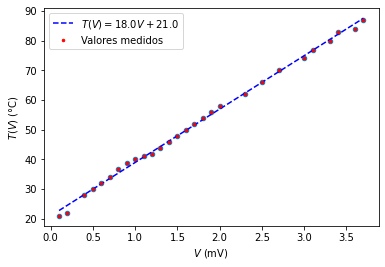

In [2]:
import pandas as pd
termopar_data = pd.read_csv('termopar_data.csv')
termopar_data.plot(x='V', y='T', kind='scatter')

termopar_model = LinModel(termopar_data, xlabel='V', ylabel='T')
termopar_model.plot(y_var_name='T', x_var_name='V', data_label='Valores medidos', colors=['red', 'blue'], y_var_units='°C', x_var_units='mV')
termopar_model.stat_summary

## Termistor NTC

\begin{align}
R(T) = R_0 \exp{\left(\beta \left[\dfrac{1}{T}-\dfrac{1}{T_0}\right]\right)} \\
= R_0 \exp{\left(\dfrac{E_g}{\kappa_B} \left[\dfrac{1}{T}-\dfrac{1}{T_0}\right]\right)}
\end{align}

Resistencia en $\text{k}\Omega$

In [3]:
from numpy import log
termistor_data = pd.read_csv('termistor_data.csv')

# log-log
termistor_data['T_log'] = termistor_data['T'].apply(log)
termistor_data['R_log'] = termistor_data['R'].apply(log)

,Parámetro,Valor estimado,Error estándar,Incertidumbre
0,m,-0.523322,0.014029,0.028836
1,b,5.677783,0.051471,0.105801


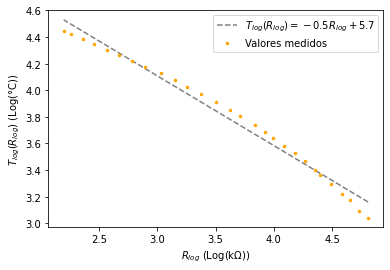

In [4]:
termistor_model = LinModel(termistor_data, xlabel='R_log', ylabel='T_log')
termistor_model.plot(y_var_name='T_{log}', x_var_name='R_{log}', data_label='Valores medidos', colors=['orange', 'gray'], y_var_units='Log(°C)', x_var_units='Log(k$\Omega$)')
termistor_model.stat_summary

## Termistor Metálico - Bobina de cobre

\begin{align}
R(T) = R_0 \left[ 1 + \alpha (T-T_0)\right]
\end{align}

Resistencia medida en $\Omega$

,Parámetro,Valor estimado,Error estándar,Incertidumbre
0,m,23.870085,0.347305,0.716801
1,b,-231.788376,4.193118,8.654171


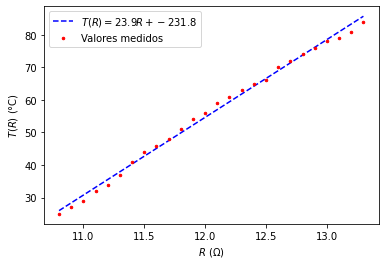

In [5]:
bobina_data = pd.read_csv('termistor_bobina_data.csv')

bobina_data = LinModel(bobina_data, xlabel='R', ylabel='T')
bobina_data.plot(y_var_name='T', 
                    x_var_name='R', 
                    data_label='Valores medidos', 
                    colors=['red', 'blue'], 
                    y_var_units='°C', 
                    x_var_units='$\Omega$')
bobina_data.stat_summary

## Diodo
Se mantiene constante el voltaje a 5 V. Se mide la caída de potencial en el diodo, en unidades de voltios.

,Parámetro,Valor estimado,Error estándar,Incertidumbre
0,m,-450.6047,1.804573,3.702679
1,b,280.4107,0.904320,1.855511


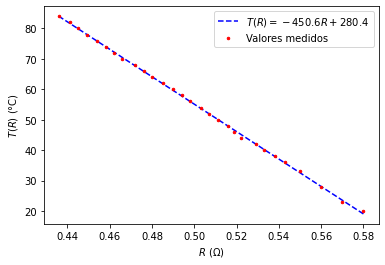

In [6]:
diodo_data = pd.read_csv('diodo_data.csv')
#diodo_data.plot(x='V', y='T', kind='scatter')
diodo_data = LinModel(diodo_data, xlabel='V', ylabel='T')
diodo_data.plot(y_var_name='T', 
                    x_var_name='R', 
                    data_label='Valores medidos', 
                    colors=['red', 'blue'], 
                    y_var_units='°C', 
                    x_var_units='$\Omega$')
diodo_data.stat_summary
